In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date
import datetime
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('12_coin_Bitcoin.csv')

In [ ]:
df['Target'] = (df['Low'] + df['High']) / 2

In [ ]:
df = df.drop(['Open', 'Close','Name','Symbol'], axis=1)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(date2num)

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 8.341690355932831e-07
Mean Squared Error: 2.6880183193979237e-12


In [ ]:
last_date = df['Date'].max()
last_row = df.iloc[-1, :]
last_row = last_row.drop('Target')

In [ ]:
next_two_months = pd.DataFrame([last_row]*60)

In [ ]:
next_two_months['Date'] = [last_date + i for i in range(1, 61)]

In [ ]:
forecast = model.predict(next_two_months)

In [ ]:
print(f'Forecasted price at the end of 2 months: {forecast[-1]}')

Forecasted price at the end of 2 months: 34319.22627115523


In [ ]:
X_test_dates = [num2date(date) for date in X_test['Date']]
next_two_months_dates = [num2date(date) for date in next_two_months['Date']]

In [ ]:
X_test['Date'] = [mdates.num2date(date) for date in X_test['Date']]

In [ ]:
coefficients = np.polyfit(mdates.date2num(X_test['Date']), y_test, 1)
polynomial = np.poly1d(coefficients)

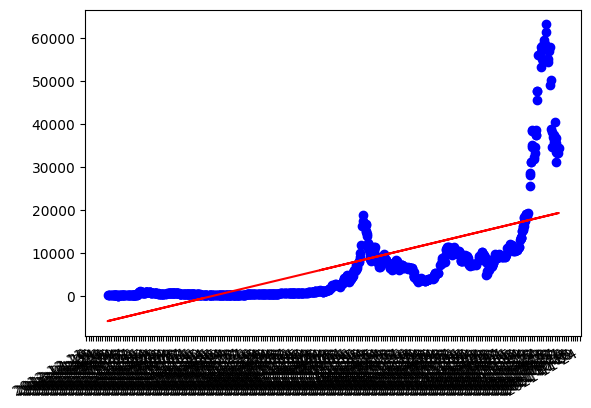

In [ ]:
y_fit = polynomial(mdates.date2num(X_test['Date']))
plt.scatter(X_test['Date'], y_test, color='blue')
plt.plot(X_test['Date'], y_fit, color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.show()